# Plot AFAPE Results
Plot the results for different agents 

In [1]:
%load_ext autoreload
%autoreload 2

## Define paths

In [2]:
# which dataset to work on 
dataset_name   = "synthetic_1"

# name for of missingness scenario 
miss_scenario  = 'MCAR_1'

# name for agents
agent_names  = ['DQN'] #, 'Random 10%']
n_agents = len(agent_names) 

# name for mi datasets
mi_model_name = 'mi_simple'

# included estimators
included_estimator_types =  ['blocking', 'ground_truth', mi_model_name ]

In [3]:
# other specifications 
data_dir       = "../../../data/static/" + dataset_name + "/" + miss_scenario + "/" 
agent_dirs     = [data_dir + 'afa_agents' + '/' + agent_name + '/' for agent_name in agent_names]

# find all bootstrap results files
agent_bootstrap_files_list = []
for agent_i in range(n_agents):
    agent_bootstrap_files = {}
    for included_estimator_type in included_estimator_types:
        agent_bootstrap_files[included_estimator_type] = agent_dirs[agent_i] + included_estimator_type + '_' + 'J_bootstraps.hkl'
    agent_bootstrap_files_list.append(agent_bootstrap_files)

## Write a Report

In [4]:
from afa.afa_models.afa_estimators.afa_report import AFAReport

Agent:  DQN
\begin{longtable}{lrrr}
\hline
 Estimator    &   Estimate &   Error &   Error (\%) \\
\hline
\endhead
 Blocking     &      0.904 &   0.157 &      0.1484 \\
 CC           &      1.006 &   0.055 &      0.0514 \\
 IPW\_miss\_gt  &      1.006 &   0.055 &      0.0514 \\
 Ground\_truth &      1.061 &   0     &      0      \\
 mi\_simple    &      1.827 &   0.766 &      0.7225 \\
\hline
\end{longtable}


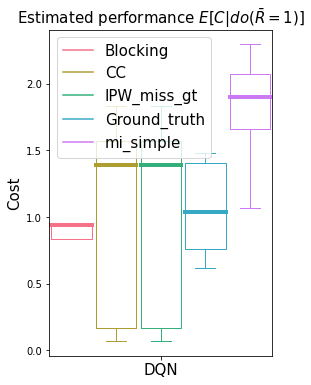

In [5]:
afa_report = AFAReport( agent_bootstrap_files_list = agent_bootstrap_files_list, 
                        agent_names                = agent_names, 
                        dataset_name               = dataset_name, 
                        miss_scenario              = miss_scenario) 

explanation_file = data_dir + 'afape_report.md'  # +  'reports/' + 'model_report' 
afa_report.explain(file= explanation_file, format = 'markdown')